Integrantes : <BR>
SERGIO CARREÑO ARANGUIZ<BR>
FELIPE SALAZAR SCHLOTTERBECK
<hr>


Variables de primera etapa:

*   W<sub>i</sub> : Cantidad a elaborar en la planta i (i=1...2)
*   X<sub>ij</sub> : Cantidad a enviar desde la planta i al estanque j (i=1…2; j=1…3)

Variables de segunda etapa:

*   Y<sup>e</sup><sub>jk</sub> : Cantidad a enviar desde el estanque j al cliente k, en el escenario e (j=1..3; k=1..3; e=1...18).

Parámetros:

*   O<sub>i</sub>: Capacidad de producción de la planta i (i=1...2)
*   Q<sub>j</sub>: Capacidad de almacenamiento del estanque j (j=1…3)
*   CE<sub>i</sub>: Costo unitario de elaboración de productos en la planta i (i=1...2)
*   CPB<sub>ij</sub>: Costo unitario de envío de productos desde planta i al estanque j (i=1…2; j=1…3)


*   CA<sub>j</sub: Costo unitario de almacenamiento en el estanque j (j=1…3)
*   CBC<sub>jk</sub>: Costo unitario de envío desde el estanque j al cliente k (j=1…3; k=1…3)
*   P<sub>k</sub>: Precio por unidad de producto que paga el cliente k (k=1…3)
*   P<sub>e</sub>: Probabilidad de ocurrencia del escenario e (e=1...18)
*   D<sup>e</sup><sub>k</sub>: Demanda de cada cliente k, si ocurre el escenario e (k=1...3; e=1...18)





Función Objetivo:

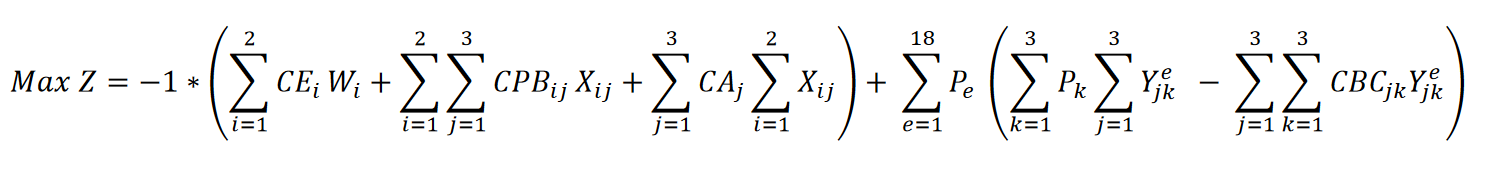

Restricciones
1. W<sub>i</sub> ≤ O<sub>i</sub> ∀i = 1...2
2. ∑<sup>3</sup><sub>j = 1</sub> X<sub>ij</sub> ≤ W<sub>i</sub> ∀i = 1...2
3. ∑<sup>2</sup><sub>i = 1</sub> X<sub>ij</sub> ≤ Q<sub>j</sub> ∀j = 1...3
4. ∑<sup>3</sup><sub>k = 1</sub> Y<sup>e</sup><sub>jk</sub> ≤ ∑<sup>2</sup><sub>i = 1</sub>  X<sub>ij</sub>  ∀ e = 1...18; j = 1...3
5. ∑<sup>3</sup><sub>j = 1</sub> Y<sup>e</sup><sub>jk</sub> ≤ D<sup>e</sup><sub>k</sub>  ∀ e = 1...18; k = 1...3

<hr>
Librerias necesarios

In [ ]:
!pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 21.3 MB/s eta 0:00:00


<hr>

In [ ]:
import gurobipy as gp
from gurobipy import GRB

#solo si se quieren dejar como parametros fijos, cambiar escenarios
W = [250, 1400]
x = [[250, 0, 0], [0, 600, 800]]
E2 = [[500, 0, 0], [500, 0, 0], [500, 0, 50], [500, 50, 0], [500, 100, 0], [500, 50, 50], [500, 100, 0], [500, 100, 0], [500, 50, 50], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0]]
E3 = [[0, 0, 400], [0, 0, 600], [0, 0, 800], [0, 400, 400], [0, 200, 600], [0, 0, 800], [0, 400, 400], [0, 200, 600], [0, 0, 800], [0, 0, 400], [0, 0, 600], [0, 0, 800], [0, 400, 400], [0, 200, 600], [0, 0, 800], [0, 490, 400], [0, 200, 600], [0, 0, 800]]
#fin opcional


CE = [50, 45]
CPB = [[5, 7 ,8 ], [8 ,6, 9]]
CA = [2, 3, 1]
CBC =  [[10, 12, 13 ], [9, 13, 15]]
PK = [110, 98, 103]

O = [1600, 1400]
Q = [1200, 1300, 800]
PE = [0.0525, 0.063, 0.0945, 0.0675, 0.081, 0.1215, 0.03, 0.036, 0.054, 0.035, 0.042, 0.063, 0.045, 0.054, 0.081, 0.02, 0.024, 0.036]
D = [[500, 0 ,400],[500, 0 ,600],[500, 0 ,1100],[500, 700 ,400],[500, 700 ,600],[500, 700 ,1100],[500, 1000 ,400],[500, 1000 ,600],[500, 1000 ,1100],[850, 0 ,400],[850, 0 ,600],[850, 0 ,1100],[850, 700 ,400],[850, 700 ,600],[850, 700 ,1100],[850, 1000 ,400],[850, 1000 ,600],[850, 1000 ,1100]]

try:
    # Crear un nuevo modelo
    m = gp.Model("Utilidades")

    # Crear diccionarios de variables
    w_i = {(i): m.addVar(vtype=GRB.CONTINUOUS, name=f"w") for i in range(2)}
    x_ij = {(i, j): m.addVar(vtype=GRB.CONTINUOUS, name=f"x") for i in range(2) for j in range(3)}

    y_ejk = {(j, k, e): m.addVar(vtype=GRB.CONTINUOUS, name=f"y") for j in range(3) for k in range(3) for e in range(3)}

    #separammos la funcion en sumatorias

    p1 = gp.quicksum(w_i[(i)] * CE[i] for i in range(2))
    p2 = gp.quicksum(gp.quicksum(x_ij[(i, j)] * CPB[i][j] for j in range(3)) for i in range(2))

    p3 = gp.quicksum(x_ij[(i, j)] * gp.quicksum(CA[j] for j in range(3))  for j in range(3) for i in range(2))
    p4 = gp.quicksum(y_ejk[(j, k , e)]  *  gp.quicksum(PK[k] for k in range(3)) for j in range(3)  for k in range(3) for e in range(2))
    p5 = gp.quicksum(gp.quicksum(gp.quicksum(y_ejk[(j, k, e)] * CBC[i][j] for j in range(3)) for i in range(2)) for k in range(3) for e in range(2))
    #p5 = gp.quicksum(gp.quicksum((y_ejk[(j, k , e)]  *  CBC[i][j]  for i in range(2) for j in range(3))  for k in range(3) for e in range(2)))

    #unimos las expresiones
    expr1 = (p1+p2+p3)*-1
    expr2 = gp.quicksum(PE[e]* (p4-p5) for e in range(18))

    #modelo
    m.setObjective((expr1 + expr2), GRB.MAXIMIZE)


    #restricciones
    m.addConstrs((w_i[i] <= O[i] for i in range(2)), "R1")
    #m.addConstr(gp.quicksum(x_ij[(i, j)] for j in range(3) for i in range(2)) <= w_i[i] for i in range(2), "R2")

    for i in range(2):
      m.addConstr(gp.quicksum(x_ij[(i, j)] for j in range(3)) <= w_i[i], f"R2_{i}_leq_w_{i}")

    for j in range(3):
      m.addConstr(gp.quicksum(x_ij[(i, j)] for i in range(2)) <= Q[j] , f"R3_{i}_leq_w_{i}")


    r4a = gp.quicksum(y_ejk[(j, k, e)]  for j in range(3) for k in range(3) for e in range(2))
    m.addConstr( r4a <= gp.quicksum(x_ij[(i, j)] for j in range(3) for i in range(2)), "R4")

    for i in range(18):
      for j in range(3):
        m.addConstr(r4a <= D[i][j], f"R5_{i}_leq_w_{j}")

    # Resolver el modelo
    m.optimize()

    print(m.summary())


except gp.GurobiError as e:
    print(f"Error en Gurobi: {e}")
except AttributeError:
    print("Error de atributo")




Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 62 rows, 35 columns and 1012 nonzeros
Model fingerprint: 0xd08792da
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 2e+03]
Presolve removed 62 rows and 35 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective -0.000000000e+00
Error de atributo
